In [2]:
%cd drive/MyDrive/MML/Kryptonite-N

/content/drive/MyDrive/MML/Kryptonite-N


In [3]:
import tempfile
import os
import numpy as np
import torch
from tqdm import tqdm
from torch import nn, optim
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2Model
import pandas as pd

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

In [4]:
!pip install tensorflow

Neural network with n=15

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Load data for n=15
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Polynomial feature expansion (degree can be tuned)
#degree = 5  # Example degree, tune as needed
#poly = PolynomialFeatures(degree)
#X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_poly = scaler.fit_transform(X)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_poly, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Add dropout to prevent overfitting
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Tunable learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=200,  # Maximum number of epochs, adjust based on convergence
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optionally, predict on test set for additional metrics
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Test set accuracy score:", accuracy_score(y_test, y_test_pred))

Epoch 1/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5097 - loss: 0.9381 - val_accuracy: 0.4924 - val_loss: 0.7123
Epoch 2/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4984 - loss: 0.7815 - val_accuracy: 0.4994 - val_loss: 0.7032
Epoch 3/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5089 - loss: 0.7230 - val_accuracy: 0.5016 - val_loss: 0.6974
Epoch 4/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5080 - loss: 0.7032 - val_accuracy: 0.5066 - val_loss: 0.6946
Epoch 5/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5159 - loss: 0.6962 - val_accuracy: 0.5051 - val_loss: 0.6941
Epoch 6/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5163 - loss: 0.6951 - val_accuracy: 0.5060 - val_loss: 0.6941
Epoch 7/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5118 - loss: 0.6937 - val_accuracy: 0.4986 - val_loss: 0.6938
Epoch 8/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5177 - loss: 0.6935 - val_accu

PMF of the labels: {0: 0.4991333333333333, 1: 0.5008666666666667}


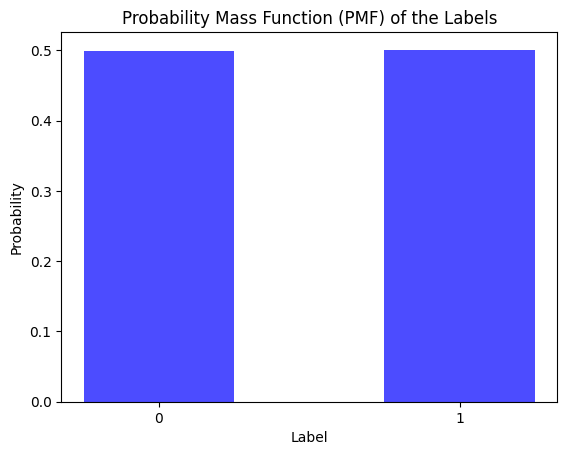

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the labels
y = np.load('Datasets/kryptonite-15-y.npy')

# Compute the PMF of the binary labels
label_counts = Counter(y)  # Count occurrences of each unique label
total_samples = len(y)  # Total number of samples

# Compute the probabilities (PMF)
pmf = {key: count / total_samples for key, count in label_counts.items()}

# Print the PMF
print(f"PMF of the labels: {pmf}")

# Plot the PMF
plt.bar(pmf.keys(), pmf.values(), width=0.5, color='b', alpha=0.7)
plt.title('Probability Mass Function (PMF) of the Labels')
plt.xlabel('Label')
plt.ylabel('Probability')
plt.xticks([0, 1])  # Since this is binary classification (0 or 1)
plt.show()


Histograms for each feature

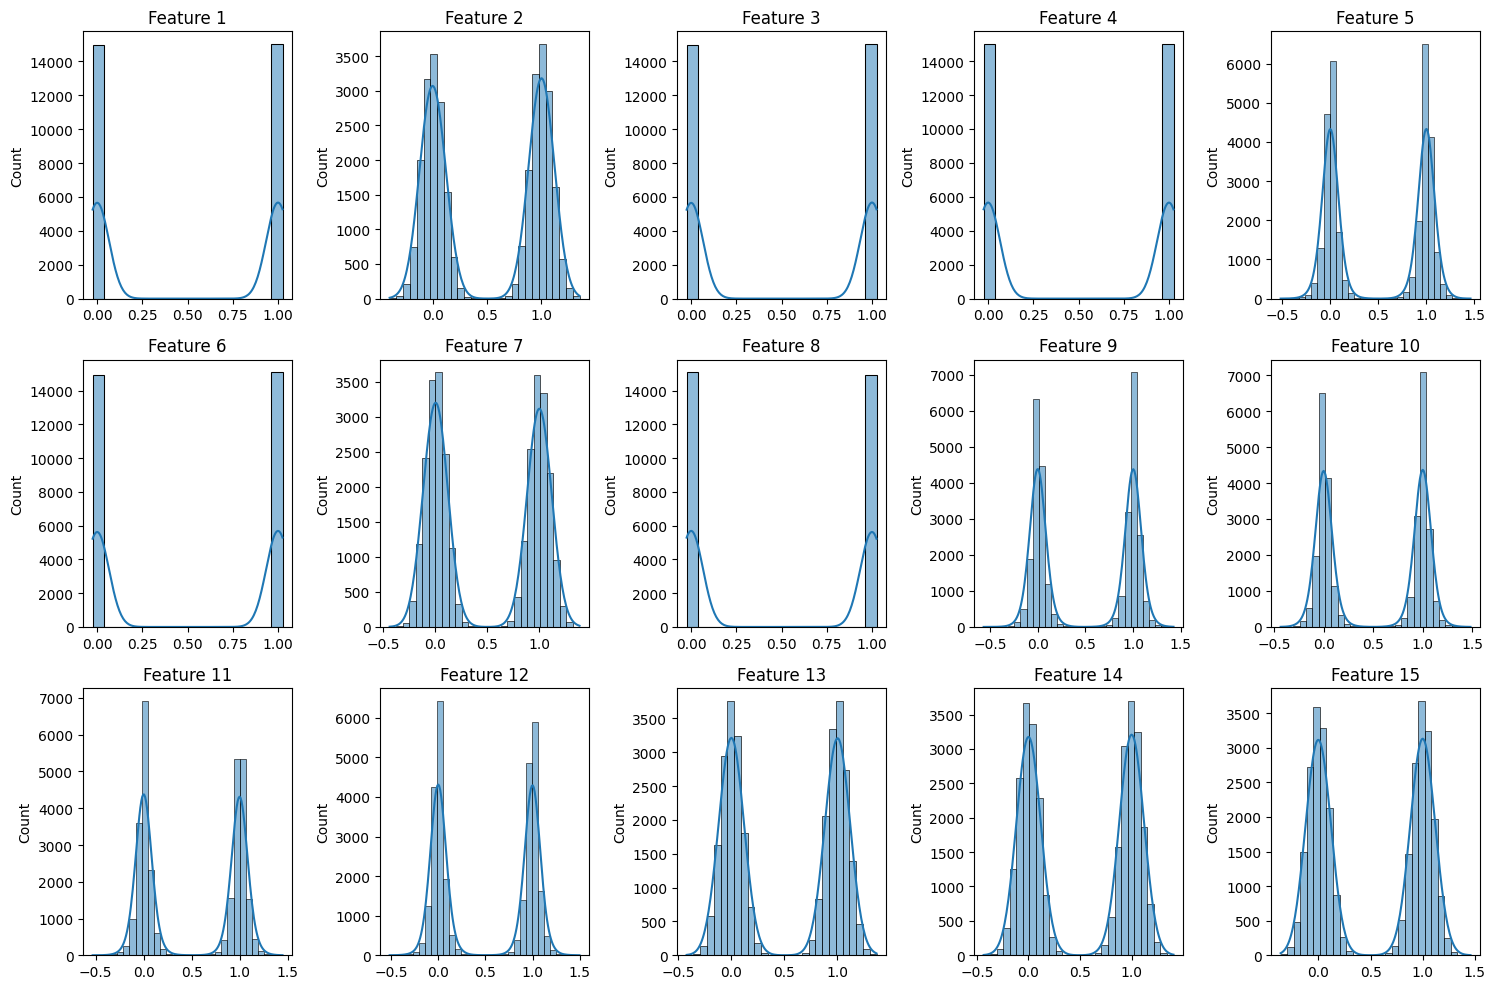

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of each feature using histograms or KDE plots
X = np.load('Datasets/kryptonite-15-X.npy')

plt.figure(figsize=(15, 10))
for i in range(X.shape[1]):  # Loop over each feature
    plt.subplot(3, 5, i+1)  # 3 rows, 5 columns of subplots
    sns.histplot(X[:, i], kde=True)
    plt.title(f"Feature {i+1}")
plt.tight_layout()
plt.show()


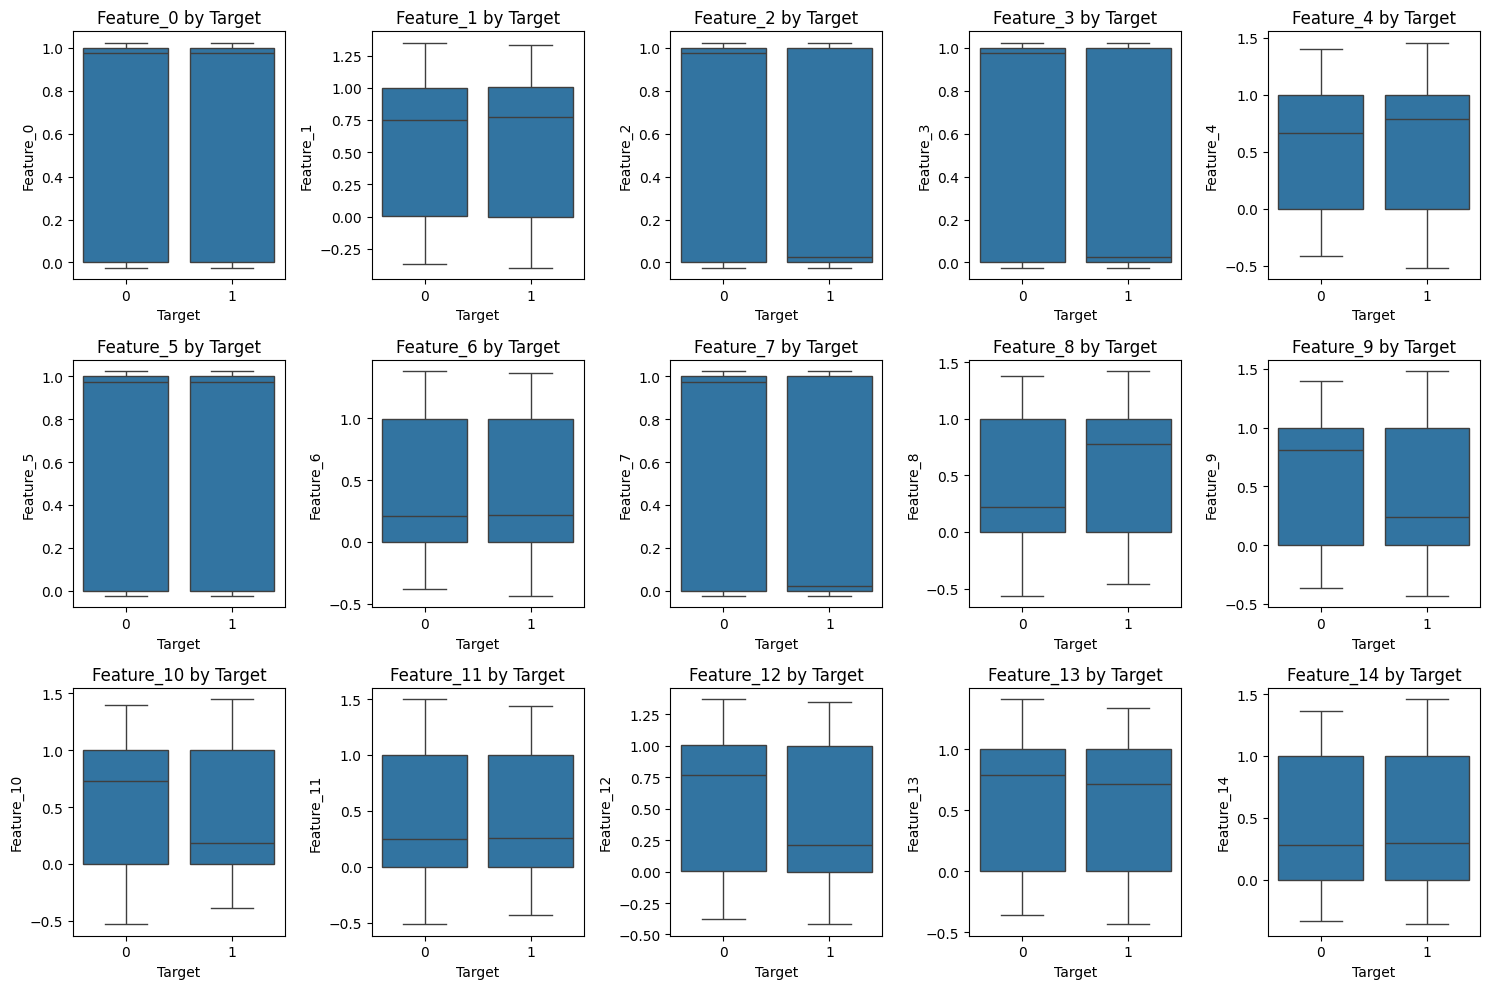

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is a NumPy array and y is the target array
# Convert to DataFrame for easier plotting
X_df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
X_df['Target'] = y  # Add target variable as a new column

# Plot boxplots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_df.columns[:-1], 1):  # Exclude the target column
    plt.subplot(3, 5, i)
    sns.boxplot(x='Target', y=column, data=X_df)
    plt.title(f'{column} by Target')
plt.tight_layout()
plt.show()

In [ ]:
X_df = pd.DataFrame(X)

# Check data types
X_df[:,0]

KeyError: (slice(None, None, None), 0)

In [ ]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.996173,0.956051,0.996667,0.996277,1.059909,0.001264,0.873094,1.007966,1.000990,0.022724,1.006658,0.022701,1.127430,0.074277,0.017315
1,0.006547,1.020477,-0.008005,1.004628,0.035674,1.012281,0.084537,-0.014649,0.082620,0.001781,0.027829,1.042081,-0.002367,-0.113402,-0.055074
2,0.007710,0.912241,1.016975,0.991638,-0.049358,-0.020277,1.020928,-0.005706,1.127389,1.040092,0.083031,0.997217,0.827584,1.085201,0.811360
3,-0.023931,0.984499,0.012102,0.997157,-0.064135,0.993271,0.987862,0.015136,0.014050,1.013472,0.943773,0.794674,0.102877,0.836715,0.007721
4,1.000933,0.204484,0.984101,0.998230,0.920155,0.024767,1.076208,0.006598,0.979603,0.047313,0.151997,1.025419,0.045567,0.974360,-0.256902


In [ ]:
import pandas as pd

# Load data into a pandas DataFrame (assuming X is your feature matrix)
X = np.load('Datasets/kryptonite-15-X.npy')
df = pd.DataFrame(X)

# Compute the min and max for each feature
min_values = df.min()
max_values = df.max()

# Compute the range (max - min) for each feature
ranges = max_values - min_values

# Print the results
for i in range(df.shape[1]):
    print(f"Feature {i+1} - Min: {min_values[i]}, Max: {max_values[i]}, Range: {ranges[i]}")


Feature 1 - Min: -0.024999039247632027, Max: 1.0249987840652466, Range: 1.0499978065490723
Feature 2 - Min: -0.39700847864151, Max: 1.3505409955978394, Range: 1.7475495338439941
Feature 3 - Min: -0.02499759942293167, Max: 1.0249947309494019, Range: 1.049992322921753
Feature 4 - Min: -0.024994585663080215, Max: 1.0249968767166138, Range: 1.049991488456726
Feature 5 - Min: -0.5177256464958191, Max: 1.4595128297805786, Range: 1.977238416671753
Feature 6 - Min: -0.024992957711219788, Max: 1.0249992609024048, Range: 1.0499922037124634
Feature 7 - Min: -0.43919509649276733, Max: 1.3850361108779907, Range: 1.8242311477661133
Feature 8 - Min: -0.0249888077378273, Max: 1.0249989032745361, Range: 1.0499876737594604
Feature 9 - Min: -0.5671952962875366, Max: 1.4232782125473022, Range: 1.9904735088348389
Feature 10 - Min: -0.4344358742237091, Max: 1.4819583892822266, Range: 1.9163942337036133
Feature 11 - Min: -0.5315372943878174, Max: 1.447745442390442, Range: 1.9792827367782593
Feature 12 - Min:

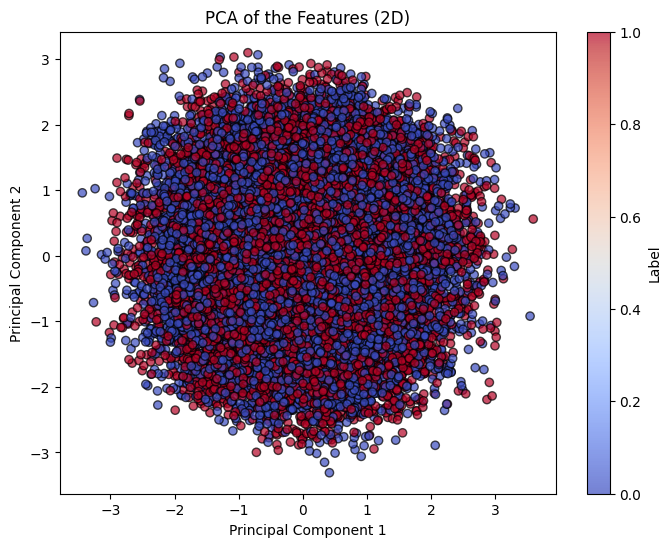

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the features before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.title('PCA of the Features (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and fit the Gradient Boosting Classifier
model = GradientBoostingClassifier(
    n_estimators=100,      # Number of boosting stages
    learning_rate=0.1,     # Step size shrinkage
    max_depth=3,           # Maximum depth of each tree
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5012222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.48      4495
           1       0.50      0.55      0.52      4505

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000



In [ ]:
from collections import Counter
print(Counter(y))


Counter({1: 15026, 0: 14974})


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and scale the data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Evaluate the clustering result (assuming ground truth is available)
print("Clustering Accuracy: ", accuracy_score(y_train, y_pred))
print("Classification Report (Clustering Result):")
print(classification_report(y_train, y_pred))


Clustering Accuracy:  0.4989166666666667
Classification Report (Clustering Result):
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      5933
           1       0.50      0.51      0.50      6067

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# Evaluate
print("Logistic Regression Evaluation:")
print(classification_report(y_val, y_pred_log_reg))
print("Random Forest Evaluation:")
print(classification_report(y_val, y_pred_rf))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.51      0.38      0.44      4539
           1       0.50      0.62      0.55      4461

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.49      9000
weighted avg       0.50      0.50      0.49      9000

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      4539
           1       0.50      0.51      0.50      4461

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Logistic Regression with class weights
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_val)
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_pred))


Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      4539
           1       0.49      0.50      0.50      4461

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000



Using Adam Optimizer with a Neural Network (Mimicking Logistic Regression)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build a simple neural network model (Logistic Regression-like)
model = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='sigmoid')  # Single neuron with sigmoid activation
])

# Compile the model with Adam optimizer
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy with RMSprop optimizer: {test_accuracy:.4f}")

# Predict and print classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4995 - loss: 0.9325 - val_accuracy: 0.5032 - val_loss: 0.7971
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5090 - loss: 0.7725 - val_accuracy: 0.5010 - val_loss: 0.7163
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5074 - loss: 0.7071 - val_accuracy: 0.5003 - val_loss: 0.6970
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5073 - loss: 0.6954 - val_accuracy: 0.5013 - val_loss: 0.6943
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5076 - loss: 0.6932 - val_accuracy: 0.5016 - val_loss: 0.6940
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5115 - loss: 0.6930 - val_accuracy: 0.5009 - val_loss: 0.6941
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5098 - loss: 0.6933 - val_accuracy: 0.5007 - val_loss: 0.6942
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5164 - loss: 0.6928 - val_accuracy: 0.501

Example: Cross-Validation with Neural Networks using KFold

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define neural network architecture
def create_model():
    model = Sequential([
        Dense(128, input_dim=X_scaled.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# K-fold Cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
    print(f"Fold {fold}")

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create the model
    model = create_model()

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),
              callbacks=[early_stopping], verbose=0)  # Turn off verbosity for clarity

    # Evaluate on validation data
    y_val_pred = (model.predict(X_val) > 0.5).astype('int32')  # Binarize predictions

    # Print full classification report
    print(classification_report(y_val, y_val_pred))
    print("="*80)  # Separator for readability

# Optionally, evaluate on the full dataset after cross-validation
model = create_model()
model.fit(X_scaled, y, epochs=100, batch_size=64, validation_split=0.2, verbose=0)
y_pred = (model.predict(X_scaled) > 0.5).astype('int32')

print("Final Classification Report (Full Dataset):")
print(classification_report(y, y_pred))



Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3008
           1       0.94      0.95      0.94      2992

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000

Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3009
           1       0.94      0.93      0.93      2991

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000

Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3024
           1       0.94      0.94      0.94      2976

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000

Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2947
           1       0.95      0.95      0.95      3053

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2986
           1       0.95      0.95      0.95      3014

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Final Classification Report (Full Dataset):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14974
           1       0.97      0.95      0.96     15026

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



In [5]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define neural network architecture
def create_model():
    model = Sequential([
        Dense(128, input_dim=X_scaled.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store predictions and true labels across all folds
y_true_all = []
y_pred_all = []

# K-fold Cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
    print(f"Fold {fold}")

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create the model
    model = create_model()

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),
              callbacks=[early_stopping], verbose=0)

    # Evaluate on validation data
    y_val_pred = (model.predict(X_val) > 0.5).astype('int32')  # Binarize predictions

    # Store the results for later aggregation
    y_true_all.extend(y_val)
    y_pred_all.extend(y_val_pred)

    # Print classification report for the current fold
    print(f"\nClassification Report for Fold {fold}:\n")
    print(classification_report(y_val, y_val_pred))
    print("="*80)

# Overall classification report
print("\nOverall Classification Report (Aggregated):\n")
print(classification_report(y_true_all, y_pred_all))


Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3008
           1       0.95      0.95      0.95      2992

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3009
           1       0.94      0.95      0.95      2991

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3024
           1       0.94      0.94      0.94      2976

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000

Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report for Fold 4:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2947
           1       0.95      0.95      0.95      3053

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report for Fold 5:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2986
           1       0.95      0.94      0.95      3014

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000


Overall Classification Report (Aggregated):

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14974
           1       0.95      0.95      0.95     15026

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000



In [ ]:
# Load the hidden dataset for which we need to predict labels
X_hidden = np.load('Datasets/hidden-kryptonite-15-X.npy')

# Standardize the hidden dataset using the same scaler fitted on the training data
X_hidden_scaled = scaler.transform(X_hidden)

# Predict the labels for the hidden dataset
y_hidden_pred = (model.predict(X_hidden_scaled) > 0.5).astype('int32')  # Binarize predictions (0 or 1)

# Save the predictions to a file
np.save('hidden-kryptonite-15-predictions.npy', y_hidden_pred)

print("Predictions for 'hidden-kryptonite-15-X.npy' saved to 'hidden-kryptonite-15-predictions.npy'")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions for 'hidden-kryptonite-15-X.npy' saved to 'hidden-kryptonite-15-predictions.npy'


In [ ]:
!pwd

/content/drive/MyDrive/MML/Kryptonite-N


Pytorch Implementation

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset

# Load and preprocess data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.output(x))
        return x

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Parameters
batch_size = 64
learning_rate = 0.001
patience = 10  # For early stopping

# Arrays to store predictions and true labels across all folds
y_true_all = []
y_pred_all = []

# Function to train the model
def train_model(model, train_loader, val_loader, criterion, optimizer):
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(100):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_val_batch, y_val_batch in val_loader:
                val_outputs = model(X_val_batch).squeeze()
                val_loss += criterion(val_outputs, y_val_batch).item()

        val_loss /= len(val_loader)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    # Load the best model
    model.load_state_dict(best_model_state)

# K-fold Cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
    print(f"Fold {fold}")

    # Split into training and validation sets
    X_train, X_val = X_tensor[train_index], X_tensor[val_index]
    y_train, y_val = y_tensor[train_index], y_tensor[val_index]

    # Create DataLoaders
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize the model, criterion, and optimizer
    model = NeuralNetwork(input_dim=X_tensor.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_model(model, train_loader, val_loader, criterion, optimizer)

    # Evaluate on validation data
    model.eval()
    y_val_pred = []
    with torch.no_grad():
        for X_val_batch, _ in val_loader:
            outputs = model(X_val_batch).squeeze()
            y_val_pred.extend((outputs > 0.5).cpu().numpy().astype('int32'))

    # Store the results for later aggregation
    y_true_all.extend(y_val.numpy())
    y_pred_all.extend(y_val_pred)

    # Print classification report for the current fold
    print(f"\nClassification Report for Fold {fold}:\n")
    print(classification_report(y_val.numpy(), y_val_pred))
    print("=" * 80)

# Overall classification report
print("\nOverall Classification Report (Aggregated):\n")
print(classification_report(y_true_all, y_pred_all))


Fold 1

Classification Report for Fold 1:

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      3008
         1.0       0.94      0.94      0.94      2992

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000

Fold 2

Classification Report for Fold 2:

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      3009
         1.0       0.91      0.96      0.93      2991

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

Fold 3

Classification Report for Fold 3:

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      3024
         1.0       0.94      0.95      0.95      2976

    accuracy                           0.95      6000